# Regression Demo :)

Welcome! Feel free to edit, play around, and modify these cells to your heart's content—they are for your own experimentation and discovery!

# Introduction
As many of you know, the census is collected every 10 years. However, the demographics throughout the United States are not stagnant; they change and are constantly evolving throughout the decade. Census data is the premier source of human-centered data within the United States, however, from a governmental and policy point of view, it's impossible for local municipalities to solely rely upon this data set when making decisions for an entire ten years (especially when such data has only grown more inaccessible over the past year).

Hence, this makes utilizing already-collected census data a ripe candidate for regression and model analysis as we can take in data that may be a few years out of date but leverage the information that's contained within it to understand the vital features to critical societal areas. Local governments can then enhance these insights with up-to-date current information which they have gathered. 

The focus of today's demo is to leverage the [Census's Planning Database (PDB)](https://www.census.gov/data/developers/data-sets/planning-database.html), which contains various demographic and socio-economic information on a per-track scale (**tracks** are just small geographic areas within counties that are meant to be relatively homogenous in population characteristics). Our goal is to use **North Carolina tract census data to predict the percentage of households with access to broadband internet.**

![Image of Charlotte's Tract](https://github.com/aesareen/Regression-Demo-F25/blob/main/imgs/tract_uncc.png?raw=true)

# Section 1: Loading in and Understanding Our Data

In [4]:
# Run this cell if you need to install our dependencies
# !pip install pandas scikit-learn numpy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [2]:
# Read in our data!
census_data = pd.read_csv('https://media.githubusercontent.com/media/aesareen/Regression-Demo-F25/refs/heads/main/data/pdb2023tr.csv')

In [ ]:
census_data

,GIDTR,State,State_name,County,County_name,Tract,Flag,Num_BGs_in_Tract,LAND_AREA,AIAN_LAND,...,Sngl_Prns_HHD_CEN_2020,pct_Sngl_Prns_HHD_CEN_2020,HHD_PPL_Und_18_CEN_2020,pct_HHD_PPL_Und_18_CEN_2020,Tot_Prns_in_HHD_CEN_2020,avg_Tot_Prns_in_HHD_CEN_2020,Renter_Occp_HU_CEN_2020,pct_Renter_Occp_HU_CEN_2020,Owner_Occp_HU_CEN_2020,pct_Owner_Occp_HU_CEN_2020
0,1001020100,1,Alabama,1,Autauga County,20100,0,2,3.794,0,...,120,18.58,245,37.93,1775,2.75,137,21.21,509,78.79
1,1001020200,1,Alabama,1,Autauga County,20200,0,2,1.282,0,...,185,25.59,252,34.85,1913,2.65,296,40.94,427,59.06
2,1001020300,1,Alabama,1,Autauga County,20300,0,2,2.065,0,...,353,27.34,412,31.91,3197,2.48,384,29.74,907,70.26
3,1001020400,1,Alabama,1,Autauga County,20400,0,4,2.465,0,...,443,25.95,501,29.35,4246,2.49,392,22.96,1315,77.04
4,1001020501,1,Alabama,1,Autauga County,20501,0,2,2.395,0,...,466,26.21,561,31.55,4310,2.42,601,33.80,1177,66.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85390,72153750501,72,Puerto Rico,153,Yauco Municipio,750501,0,3,0.703,0,...,372,23.66,422,26.84,3963,2.52,353,22.46,1219,77.54
85391,72153750502,72,Puerto Rico,153,Yauco Municipio,750502,0,1,0.266,0,...,231,30.24,229,29.97,1845,2.41,284,37.17,480,62.83
85392,72153750503,72,Puerto Rico,153,Yauco Municipio,750503,0,1,1.274,0,...,214,24.24,228,25.82,2155,2.44,189,21.40,694,78.60
85393,72153750601,72,Puerto Rico,153,Yauco Municipio,750601,0,3,4.241,0,...,381,22.95,501,30.18,4347,2.62,309,18.61,1351,81.39


In [ ]:
# Let's just get a sense of our data


,GIDTR,State,County,Tract,Flag,Num_BGs_in_Tract,LAND_AREA,AIAN_LAND,Tot_Population_CEN_2020,Tot_Population_ACS_17_21,...,Sngl_Prns_HHD_CEN_2020,pct_Sngl_Prns_HHD_CEN_2020,HHD_PPL_Und_18_CEN_2020,pct_HHD_PPL_Und_18_CEN_2020,Tot_Prns_in_HHD_CEN_2020,avg_Tot_Prns_in_HHD_CEN_2020,Renter_Occp_HU_CEN_2020,pct_Renter_Occp_HU_CEN_2020,Owner_Occp_HU_CEN_2020,pct_Owner_Occp_HU_CEN_2020
count,8.539500e+04,85395.000000,85395.000000,85395.000000,85395.000000,85395.000000,85395.000000,85395.000000,85395.000000,85395.000000,...,85395.000000,84630.000000,85395.000000,84630.000000,85395.000000,84630.000000,85395.000000,84630.000000,85395.000000,84630.000000
mean,2.837548e+10,28.287616,87.604075,256861.562890,0.004227,2.837813,41.412996,0.063692,3919.844897,3899.956145,...,414.456608,27.436397,455.525487,30.665381,3822.924410,2.577142,552.328602,37.033479,948.439756,62.966521
std,1.652800e+10,16.503719,99.632576,350501.934218,0.064881,1.084059,499.797881,0.415305,1714.981920,1716.856744,...,255.697153,10.612592,248.967218,10.380398,1706.877884,0.636373,450.425369,23.345225,543.074055,23.345225
min,1.001020e+09,1.000000,1.000000,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.301596e+10,13.000000,31.000000,10307.000000,0.000000,2.000000,0.653000,0.000000,2727.000000,2695.000000,...,243.000000,20.350000,286.000000,24.790000,2644.000000,2.290000,232.000000,18.310000,556.000000,47.960000
50%,2.804900e+10,28.000000,65.000000,42724.000000,0.000000,3.000000,1.739000,0.000000,3757.000000,3740.000000,...,368.000000,26.640000,424.000000,29.920000,3668.000000,2.510000,433.000000,31.405000,899.000000,68.595000
75%,4.201301e+10,42.000000,111.000000,460600.500000,0.000000,3.000000,10.863000,0.000000,4926.500000,4928.000000,...,531.000000,33.330000,587.000000,36.030000,4828.000000,2.790000,749.000000,52.040000,1281.000000,81.690000
max,7.215375e+10,72.000000,840.000000,993000.000000,1.000000,10.000000,85554.744000,8.000000,37892.000000,38223.000000,...,4174.000000,100.000000,4770.000000,100.000000,29239.000000,39.000000,8324.000000,100.000000,7061.000000,100.000000


The number of rows in our Census Data: 85,395
The number of columns in our Census Data: 524


# Section 2: Simple Linear Regression

## Section 2.1: (Simple) Pre-Processing our Data

In [1]:
# We don't need all of these rows, only the ones in NC!


# We don't need all of these columns what so ever, so I am just selecting the ones relevant to our research question


# Let's rename these columns because they're kinda annoying

In [2]:
# Let's see how many tracts per county we are dealing with


In [ ]:
# Let's also investigate any nulls


# Let's see where those nulls are!


# I feel comfortable dropping this given that the other data that I have is also missing / unavailable
# Use the subset parameter in dropna to specify a column

# I also want to remove columns where the number of tracts in a county is less than 4

def clean_data(X):
    X = X.dropna(subset=['broadband_percent'])
    
    # Remove counties with less than 4 rows
    county_counts = X['county'].value_counts()
    counties_to_keep = county_counts[county_counts >= 4].index
    X = X[X['county'].isin(counties_to_keep)]
    
    return X





# Last quick check


county                0
tract                 0
under_5_count         0
5_to_17_count         0
18_to_24_count        0
broadband_percent    30
dtype: int64


,county,tract,under_5_count,5_to_17_count,18_to_24_count,broadband_percent
55143,Alamance County,20100,336,525,284,69.66
55144,Alamance County,20200,97,1009,453,66.92
55145,Alamance County,20301,223,740,104,70.01
55146,Alamance County,20302,321,813,300,74.32
55147,Alamance County,20400,420,1346,571,61.15
...,...,...,...,...,...,...
57810,Yancey County,960101,135,758,174,64.75
57811,Yancey County,960102,185,223,226,58.40
57812,Yancey County,960200,243,517,225,66.86
57813,Yancey County,960300,103,505,231,62.40


county               0
tract                0
under_5_count        0
5_to_17_count        0
18_to_24_count       0
broadband_percent    0
dtype: int64


<Axes: >

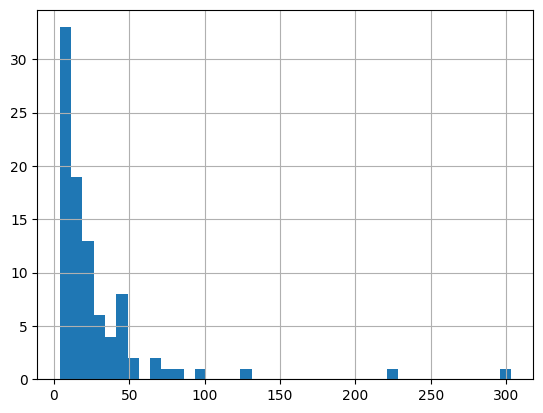

In [ ]:
# Let's see the distribution of our county values now!
census_data_simple['county'].value_counts().hist(bins = 40)

In [3]:
# I want a single column that shows me the amount of young people within each track

# Section 2.2. (Simple) Modeling

The most basic form of linear regression is just called **univariate linear regression**, were we are leveraging just a single (independent) predictor variable to determine our output (dependent variable). Mathematically, that looks like:

$$ \hat{y} = \hat{\beta}_1 x + \hat{\beta}_0$$

We don't even need to do any fancy machine learning here, as we have well-established statistical formulas that can calculate this just through simple arithmetic. 

$$ \beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} $$
$$ \beta_0 = \bar{y} - \hat{\beta}_1\hat{x} $$

Where $n$ is equal to the number of rows within our dataset. We will use scikit-learn's `LinearRegression` class but I encourage you to explore how this statistical method lines up!

In [ ]:
# Using just two variables, we investigate whether the number of young people in a tract are correlated to broadband percent

# Split our dataset


In [ ]:
# Let's create a model!


In [ ]:
# We can train the model and also make some predictions


In [ ]:
# Let's evaluate how our model did!


print(f'The R^2 value within our dataset is {simple_r2 * 100:.2f}%') 
print(f'The Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

The R^2 value within our dataset is 1.57%
The Mean Squared Error (MSE): 254.4512
Root Mean Squared Error (RMSE): 15.9515


# Section 3. Multivariate Linear Regression

So, clearly, the number of young people within a tract is certainly not nearly enough information to figure out the number of households with broadband internet. We need to pick out some more features and feed them into our model, and luckily, that is where **multinomial linear regression** comes in!

The equation for multinomial linear regression can get kind of long winded and a bit nasty, and it brings it a bit of linear algebra. For instance, for a regression problem with two predictors, we need to solve the following system of equations:

$$
\begin{bmatrix}
n & \sum x_{1i} & \sum x_{2i} \\
\sum x_{1i} & \sum x_{1i}^2 & \sum x_{1i}x_{2i} \\
\sum x_{2i} & \sum x_{1i}x_{2i} & \sum x_{2i}^2
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{bmatrix}
=
\begin{bmatrix}
\sum y_i \\
\sum x_{1i}y_i \\
\sum x_{2i}y_i
\end{bmatrix}
$$

Eventually, as we increase the number of predictors, this yields us the **normal equation** in matrix form: $\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = \mathbf{X}^T\mathbf{y}$, where we solve for the coefficient vector $\boldsymbol{\beta}$.


As you can imagine, as we add more features (predictors), this matrix grows larger and the calculations become more complex. Fortunately, we have libraries like scikit-learn handle all of this matrix math for us!

## Section 3.1: (Multiple) Pre-Processing + Modeling Our Data

In [ ]:
# There are a number of columns that aren't necessarily the feature values but the Margin of Error (MOE)
# We want to remove those! We can do so by getting rid of all columns that end in "ACSMOE_17_21"



# There are a few columns that contain currency values that we'll want to convert to a float before proceeding.
# I did the liberty of finding those columns for you, and you can copy them from here:
# ['Med_HHD_Inc_ACS_17_21', 'Aggregate_HH_INC_ACS_17_21']

# Our target is still pct_HHD_w_Broadband_ACS_17_21, so drop rows in which that is invalid
# We also want to repeat the process of removing counties with just a few tracts
# Luckily, we have our function from earlier!


"""
There are a series of columns alongside our target that are very similar, so want to drop that from our input dataset
They are: 
columns=[
        "Pop_w_BroadComp_ACS_17_21",
        "Pop_w_BroadComp_ACS_17_21",
        "HHD_w_Broadband_ACS_17_21",
        "pct_Pop_w_BroadComp_ACS_17_21",
        "HHD_No_Internet_ACS_17_21",
        "pct_HHD_No_Internet_ACS_17_21",
        "internet_return_rate_cen_2020",
        "internet_response_rate_cen_2020",
        'broadband_percent'
    ]
"""

# We also have to drop some of the columns that aren't numerical here

# Extract our target values

In [ ]:
# With a lot more columns, it's imperative that we now check where our null values lie throughout our training dataset.


bilq_return_rate_cen_2020        2573
bilq_response_rate_cen_2020      2572
pct_Schl_Enroll_3_4_ACS_17_21     139
pct_Civ_emp_16_24_ACS_17_21        19
pct_Civ_unemp_16_24_ACS_17_21      19
Med_HHD_Inc_ACS_17_21              13
pct_NoHealthIns_65P_ACS_17_21      12
pct_Children_in_Pov_ACS_17_21      11
Aggregate_HH_INC_ACS_17_21          6
Self_Response_Rate_ACS_17_21        6
pct_Civ_emp_45_64_ACS_17_21         6
pct_Civ_unemp_45_64_ACS_17_21       6
pct_NoHealthIns_U19_ACS_17_21       6
pct_Civ_emp_25_44_ACS_17_21         3
pct_Civ_unemp_25_44_ACS_17_21       3
Median_Age_ACS_17_21                2
pct_Owner_Occp_HU_CEN_2020          1
pct_MrdCple_HHD_CEN_2020            1
pct_Rel_Family_HHD_CEN_2020         1
pct_Not_MrdCple_HHD_CEN_2020        1
pct_Female_No_SP_CEN_2020           1
pct_NonFamily_HHD_CEN_2020          1
pct_Sngl_Prns_HHD_CEN_2020          1
pct_HHD_PPL_Und_18_CEN_2020         1
avg_Tot_Prns_in_HHD_CEN_2020        1
pct_Renter_Occp_HU_CEN_2020         1
MrdCple_Fmly

In [ ]:
# bilq_return_rate_cen_2020 & bilq_response_rate_cen_2020 are mostly null through our dataset
# So let's drop them


# Create a constant for the number of predictors we want in our multivariate regression

# We can also build an pre-processing pipeline that can handle the rest of our null values!


# New data split because our data has vastly changed from before


# Allow our data to go through our pipeline


## Section 3.2: (Multiple) Evaluating & Investigating Our Model

In [ ]:
# Evaluate the pipeline model
adjusted_r2 = lambda r2, num_of_rows, num_of_predictors: 1 - ((1 - r2) * (num_of_rows - 1) / (num_of_rows - num_of_predictors - 1))


print(f'Pipeline R^2 Score: {multi_r2 * 100:.2f}')
print(f'Pipeline Adjusted R^2: {adjusted_r2(multi_r2, len(X_tst), NUM_OF_PREDICTORS)}')
print(f'Pipeline MSE: {multi_mse:.4f}')
print(f'Pipeline RMSE: {multi_rmse:.4f}')

Pipeline R^2 Score: 73.30
Pipeline Adjusted R^2: 0.7296667926897336
Pipeline MSE: 64.8700
Pipeline RMSE: 8.0542


In [115]:
# Let's inspect what our pipeline did!

# Which features were selected by SelectKBest?
feature_selector = pipeline.named_steps['feature_selector']
selected_mask = feature_selector.get_support()

feature_importance_df = pd.DataFrame({
    'Feature': X.columns[selected_mask],
    'F_Score': feature_selector.scores_[selected_mask]
}).sort_values('F_Score', ascending=False)

feature_importance_df

,Feature,F_Score
4,pct_HHD_w_Computer_ACS_17_21,4252.631709
3,pct_HHD_NoCompDevic_ACS_17_21,2229.458434
5,pct_HHD_w_OnlySPhne_ACS_17_21,1787.996353
2,pct_Pop_NoCompDevic_ACS_17_21,1601.013410
1,pct_College_ACS_17_21,1569.191727
0,Med_HHD_Inc_ACS_17_21,1496.018946
7,paper_return_rate_cen_2020,1480.579225
6,paper_response_rate_cen_2020,1342.207764


# Section 4: Polynomial Regression

So far, we have only assumed there is a linear relationship between each one of our variables, but what if this doesn't hold true? For example, going back to our example where we try to predict the percentage of households with the broadband internet by looking at the amount of young people within each tract, we were saying:

$$
\text{percent with internet} = \hat{\beta}_1 (\text{young people}) + \hat{\beta}_0
$$

What if we said the percentage was actually based on the amount of young people squared?
$$
\text{percent with internet} = \hat{\beta}_1 (\text{young people})^2 + \hat{\beta}_0
$$

Or similarly, to some arbitrary d-degree?

$$
\text{percent with internet} = \hat{\beta}_1 (\text{young people})^d + \hat{\beta}_0
$$

That is the idea of **Polynomial Regression**, instead of just saying each predictor within dataset is linearly associated with our final output, we can raise them to some polynomial degree.

In general form, a polynomial regression of degree $d$ looks like:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_d x^d + \epsilon
$$

Where:
- $y$ is our target variable (broadband percentage)
- $x$ are our predictor variable(s) 
- $\beta_0, \beta_1, \beta_2, \ldots, \beta_d$ are the coefficients we need to learn
- $\epsilon$ is the error term
- $d$ is the degree of the polynomial


In [ ]:
# We already did most of our preprocessing, so let's just modify our pipeline a bit

In [ ]:
# Let's evaluate that polynomial pipeline and see how it did! 

print(f'Pipeline R^2 Score: {polynomial_r2 * 100:.2f}')
print(f'Pipeline Adjusted R^2: {adjusted_r2(polynomial_r2, len(X_tst), NUM_OF_PREDICTORS)}')
print(f'Pipeline MSE: {polynomial_mse:.4f}')
print(f'Pipeline RMSE: {polynomial_rmse:.4f}')

Pipeline R^2 Score: 65.98
Pipeline Adjusted R^2: 0.6556382388143556
Pipeline MSE: 82.6341
Pipeline RMSE: 9.0903


# What's next? (Just some ideas for you to explore!)
- We saw that Polynomial Features performed worse, how can you maybe extract better features with these types of features?
  - Do we need 10 features; can we increase the degree each feature is raised to?
    - Be careful with increasing the degree though, you can quickly run out of memory!
- Create some visualizations to show how our models are performing in a more accessible manner
- Any machine learning model involves a whole host of user-specified parameters called **hyperparameters**. These parameters can significantly alter and improve the results of your model if they are set correctly. I recommend checking out hyperparameter [tuning modules from scikit-learn](https://scikit-learn.org/stable/modules/grid_search.html).
-  Just like classification, we can leverage decision trees via `DecisionTreeRegressor` or ensemble models such as `RandomForestRegressor` to provide a more robust regression framework for our problem. 
